# Image Classification Using Convolutional Neural Network (CNN)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.
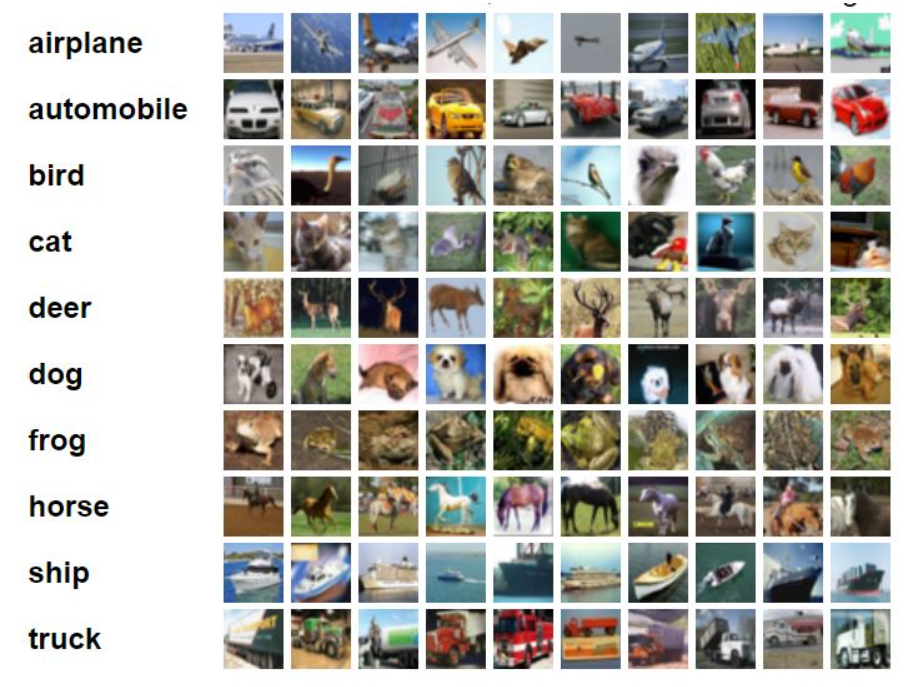


### Import Librarires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
from keras import utils
from tensorflow.keras import datasets, layers, models
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

### Loading the cifar10 dataset in the notebook

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
dicti = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [53]:
def image(X, y, i):
    plt.figure(figsize = (12,2))
    plt.imshow(X[i])

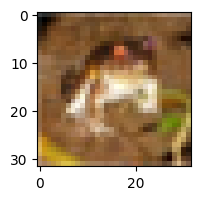

In [54]:
image(X_train, y_train, 0)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0
X_train[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

In [10]:
Y_train = utils.to_categorical(y_train) 
Y_test = utils.to_categorical(y_test) 
class_num = Y_test.shape[1]
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
Y_train.shape

(50000, 10)

### Building a Convolutional Neural Network model

In [12]:
model = Sequential()
model.add(Conv2D(32, 3, activation = 'relu', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(32, 3, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64, 3, activation = 'relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation = 'relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'softmax'))

In [13]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary()) 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 32)        128       
 chNormalization)                                                
                                                        

In [14]:
history = model.fit(X_train, Y_train, epochs=12, validation_data = (X_test, Y_test))

Epoch 1/12
1563/1563 [==============================] - 29s 18ms/step - loss: 1.3359 - accuracy: 0.5213 - val_loss: 1.3599 - val_accuracy: 0.5215
Epoch 2/12
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0042 - accuracy: 0.6494 - val_loss: 1.0451 - val_accuracy: 0.6363
Epoch 3/12
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8726 - accuracy: 0.6968 - val_loss: 1.1595 - val_accuracy: 0.6173
Epoch 4/12
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7915 - accuracy: 0.7267 - val_loss: 0.8755 - val_accuracy: 0.6927
Epoch 5/12
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7287 - accuracy: 0.7480 - val_loss: 0.9752 - val_accuracy: 0.6679
Epoch 6/12
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6821 - accuracy: 0.7637 - val_loss: 1.2904 - val_accuracy: 0.6151
Epoch 7/12
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6393 - accuracy: 0.7791 - val_loss: 0.8786 -

##### An accuracy of 82.94% is acheived by the CNN on the training dataset of 50000 training examples which is decent

In [16]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9318 - accuracy: 0.7021


[0.931825578212738, 0.7020999789237976]

##### Upon evaluating the model on the Test dataset an accuracy of 70.21% is obtained which has 10000 examples

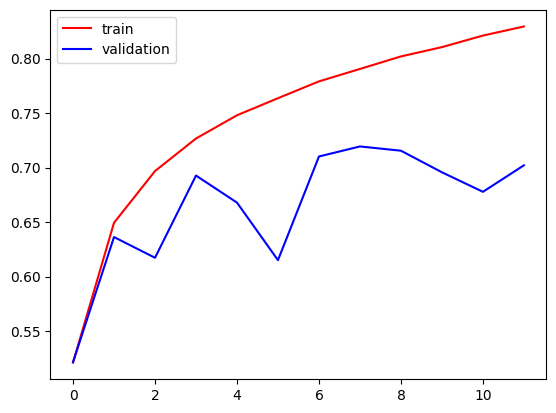

In [17]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

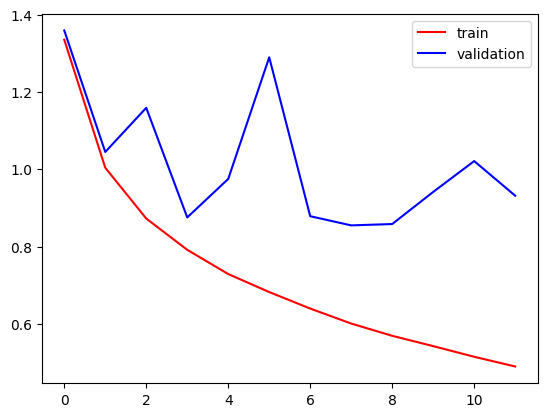

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

### Prediction by the Model

In [48]:
y_pred = model.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred] 

313/313 [==============================] - 2s 5ms/step


<Figure size 1200x200 with 0 Axes>

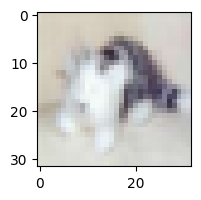

In [57]:
import random
Y_test = Y_test.reshape(-1,)
plt.figure(figsize = (12,2))
idx = random.randint(0,len(X_test))
image(X_test, y_test,idx)

In [58]:
dicti[y_classes[idx]]

'cat'

###### Hence from this project of using Convolutional Neural Networks we have found out that using CNN is much more efficient and accurate then using a standard Dense Layers Neural Networks. The accuracy acheived on a CNN model is far beeter than that acheived on a simple Neural Network